# 批量梯度下降法(BGD),随机梯度下降法(SGD),min-batch小批量梯度下降法(MBGD)
用可视化的方式来看下三种梯度下降法。

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *
np.random.seed(1)
%matplotlib inline

# 我们来拟合简单的函数 $f(x)=wx+1 $ $其中w=0.5$

In [9]:
# 生成数据
def generate_data(sample_num=200):   
    #在返回（-1, 1）范围内的等差序列
    X = np.linspace(-1, 1, sample_num) 
    Y = 0.5* X+1 ++ np.random.normal(0, 0.1, (sample_num, ))#生成Y并添加噪声
    return X,Y

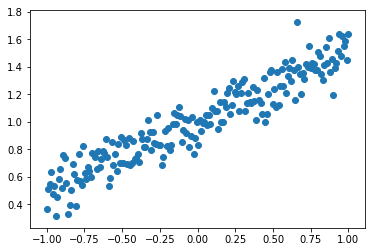

In [12]:
#显示要拟合的数据
X, Y = generate_data()
plt.scatter(X,Y)
plt.show()

In [13]:
def plot(thetas,losses):
    plt.figure(figsize=(8,6))
    plt.plot(thetas, losses)
    plt.plot(np.array(thetas),np.array(losses),color='r',marker='o')
    plt.xlim(-0.1,0.6)
    plt.ylim(-0.1,0.2)
    plt.plot(0.5, 0, 'r*',ms=15)
    plt.text(0.5, 0, 'min', color='k')
    plt.text(thetas[0]+0.01,  losses[0], 'start', color='k')
    plt.text(thetas[-1]+0.01, losses[-1]-0.01, 'end', color='k')
    
    plt.xlabel('w')
    plt.ylabel('loss')
    plt.title('w-loss')
    
    plt.figure(figsize=(8,6))
    plt.plot(np.linspace(0,1000,len(losses)), losses)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('epoch-loss')
    
    plt.figure(figsize=(8,6))
    X, Y = generate_data()
    plt.scatter(X,Y)
    Y = thetas[-1]* X+1
    plt.plot(X,Y,'r')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('x-y')
    
    plt.show()   
    print('w:',thetas[-1])
    print('loss:',losses[-1])   

# BGM（批量梯度下降法）
每次都要全部样本进行计算，方向比较稳，不会波动，但是比较慢，要迭代好多次

In [18]:
def bgd(X, Y, lr=0.01, epoch=10):
    sample_num = X.shape[0]
    w = 0.1
    loss=0
    thetas=[]
    losses=[]
    for i in range(epoch):
        loss=0
        dj=0
        error=0
        #每次都是所有样本一起算，更新一次
        for j in range(sample_num):
            predict_y =w*X[j]+1
            error +=0.5*np.power((predict_y - Y[j]), 2)
            dj+=(predict_y - Y[j])*X[j]
        loss = error/sample_num
        dj/=sample_num
        w = w-lr *dj
        losses.append(loss)
        thetas.append(w)
        
    plot(thetas,losses)

In [19]:
@interact(lr=(0, 1, 0.001),epoch=(1,2000,10),continuous_update=False)
def visualize_gradient_descent(lr=0.01,epoch=10):
    X, Y = generate_data()
    bgd(X, Y,lr,epoch)

interactive(children=(FloatSlider(value=0.01, description='lr', max=1.0, step=0.001), IntSlider(value=10, desc…

# SGD（随机梯度下降法）

In [20]:
def sgd(X, Y, lr=0.01, epoch=10):
    sample_num = X.shape[0]
    w =0

    thetas=[]
    losses=[]
    for _ in range(epoch):
        loss=0
        #每个样本单独算，单独更新一次
        for j in range(sample_num):
            predict_y =w*X[j]+1
            loss =0.5* np.power((predict_y - Y[j]), 2)
            w = w-lr *(predict_y - Y[j])*X[j]
            losses.append(loss)
            thetas.append(w)
    plot(thetas,losses)

In [21]:
#可以随时调节，查看效果 (最小值，最大值，步长)
@interact(lr=(0, 5, 0.001),epoch=(1,100,1),continuous_update=False)
def visualize_gradient_descent(lr=0.01,epoch=10):
    X, Y = generate_data()
    sgd(X, Y,lr,epoch)

interactive(children=(FloatSlider(value=0.01, description='lr', max=5.0, step=0.001), IntSlider(value=10, desc…

## MBGD（小批量梯度下降法）

In [22]:
def mbgd(X, Y, lr=0.01, epoch=10,batch_size=8):
    sample_num = X.shape[0]
    w =0

    thetas=[]
    losses=[]
    
    batch_num=(sample_num-1)//batch_size+1
    for _ in range(epoch):
        
        for i in range(batch_num):
            loss=0
            start_index = i * batch_size
            end_index = min((i + 1) * batch_size, sample_num)
            
            batch_x=X[start_index:end_index]
            batch_y=Y[start_index:end_index]
            
            num=end_index-start_index
            for j in range(num):
                predict_y =w*batch_x[j]+1
                loss+=0.5* np.power((predict_y - batch_y[j]), 2)
                w = w-lr *(predict_y - batch_y[j])*batch_x[j]
            loss /= num
            
            losses.append(loss)
            thetas.append(w)
    plot(thetas,losses)

In [23]:
#可以随时调节，查看效果 (最小值，最大值，步长)
@interact(lr=(0.01, 5.00, 0.01),epoch=(1,100,1),batch_size=(0,200,8),continuous_update=False)
def visualize_gradient_descent(lr=0.01,epoch=10,batch_size=8):
    X, Y = generate_data()
    mbgd(X, Y,lr,epoch,batch_size)

interactive(children=(FloatSlider(value=0.01, description='lr', max=5.0, min=0.01, step=0.01), IntSlider(value…